In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json

import uproot
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot

/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-matplotlib/1.5.2-gnimlf2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


ImportError: No module named awkward

In [2]:
with gzip.open("hists_quantile_qcd_finern2.pkl.gz") as fin:
    hists = pickle.load(fin)

In [3]:
with gzip.open("hists_quantile_hbb_finern2.pkl.gz") as fin2:
    hists2 = pickle.load(fin2)

In [4]:
print(hists)
print(hists2)

{'hjetpt': <Hist (dataset,AK8Puppijet0_isHadronicV,AK8Puppijet0_pt,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f8bfc1f8320>}
{'hjetpt': <Hist (dataset,AK8Puppijet0_isHadronicV,AK8Puppijet0_pt,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f8bfc1f82e8>}


In [5]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset", "AK8Puppijet0_isHadronicV")
process_map = OrderedDict()
#process_map["QCD"] = ("QCD*", slice(None))
#process_map["QCDinV"] = ("Z*", 0)
process_map["Hcc"] = ("GluGluHToCC", 2)
process_map["Hbb"] = ("GluGluHToBB", 3)
process_map["Zqq"] = ("ZJetsToQQ_HT*", 1)
process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
process_map["Top"] = ("TTTo*", slice(None))
process_map["QCD"] = ("QCD*", slice(None))


for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)
    hists2[key] = hists2[key].group(process, process_cats, process_map)

/uscms/home/separk/nobackup/coffea/fnal-column-analysis-tools/fnal_column_analysis_tools/hist/hist_tools.py:478: RuntimeWarning: Allocating a large (>10M bin) histogram!
  warnings.warn("Allocating a large (>10M bin) histogram!", RuntimeWarning)


In [6]:
x = hists['hjetpt']
x2 = hists2['hjetpt']

In [7]:
print(x)
print(x2)

<Hist (process,AK8Puppijet0_pt,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f9a80868e10>
<Hist (process,AK8Puppijet0_pt,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f9aac497f28>


In [8]:
y = x.project("AK8Puppijet0_pt", slice(450,None), overflow='allnan')
y2 = x2.project("AK8Puppijet0_pt", slice(450,None), overflow='allnan')

In [9]:
print(y)
print(y2)

<Hist (process,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f9a8085add8>
<Hist (process,jetrho,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f9a8085af60>


In [10]:
z = y.sum("jetrho")
z2 = y2.sum("jetrho")

In [11]:
print(z)
print(z2)

<Hist (process,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f9a8085ab38>
<Hist (process,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f9a8085aa90>


In [12]:
print(z2.values())

{('Hbb',): array([[1.4150202e-03, 2.8567389e-03, 3.6309953e-03, ..., 8.0552047e-01,
        5.5679721e-01, 1.5047273e-01],
       [2.2159747e-03, 4.7523323e-03, 5.0727152e-03, ..., 7.3009712e-01,
        3.9519119e-01, 7.5770333e-02],
       [3.2839149e-03, 5.3130002e-03, 5.4464936e-03, ..., 6.0194433e-01,
        2.9499170e-01, 5.1474702e-02],
       ...,
       [1.6713260e-02, 2.0504447e-02, 1.8582156e-02, ..., 8.9172982e-03,
        1.5485128e-03, 0.0000000e+00],
       [1.8528756e-02, 2.1919467e-02, 1.8582154e-02, ..., 7.5556748e-03,
        1.2815280e-03, 5.3396994e-05],
       [2.5603857e-02, 2.8300410e-02, 2.2373337e-02, ..., 3.8712821e-03,
        9.6114591e-04, 2.6698497e-05]], dtype=float32)}


In [13]:
def multidim_cumsum(a):
    out = a[...,::-1].cumsum(1)[...,::-1]
    for i in range(2,a.ndim+1):
        np.cumsum(out, axis=-i, out=out)
    return out

In [14]:
t = z.project("process").values(overflow='allnan')
t2 = z2.project("process").values(overflow='allnan')

In [15]:
background = multidim_cumsum(t[()])
signal = multidim_cumsum(t2[()])

In [16]:
sqrtbkg = np.sqrt(background)

In [17]:
print(sqrtbkg)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.8477753e+02 3.8477753e+02 3.6455392e+02 ... 1.3806063e+01
  9.2628199e-01 9.2628199e-01]
 [5.5874139e+02 5.5874139e+02 5.2295917e+02 ... 1.8896263e+01
  1.1809515e+00 1.1809515e+00]
 ...
 [4.0327412e+03 4.0327412e+03 3.2988467e+03 ... 4.8690468e+01
  1.5819118e+01 1.5819118e+01]
 [4.0336548e+03 4.0336548e+03 3.2993906e+03 ... 4.8690468e+01
  1.5819118e+01 1.5819118e+01]
 [4.0336548e+03 4.0336548e+03 3.2993906e+03 ... 4.8690468e+01
  1.5819118e+01 1.5819118e+01]]


In [18]:
soverb = signal/(sqrtbkg+1)
print(soverb)
norm_soverb = soverb/np.amax(soverb)
print(norm_soverb)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [9.3072988e-03 9.3072988e-03 9.8183369e-03 ... 1.0164716e-02
  1.3860119e-05 1.3860119e-05]
 [1.2711778e-02 1.2711778e-02 1.3572961e-02 ... 1.1372476e-02
  1.2241673e-05 1.2241673e-05]
 ...
 [1.7917106e-02 1.7917106e-02 2.1758305e-02 ... 1.0234956e-02
  6.6670371e-05 6.6670371e-05]
 [1.7914042e-02 1.7914042e-02 2.1755842e-02 ... 1.0234956e-02
  6.6670371e-05 6.6670371e-05]
 [1.7914042e-02 1.7914042e-02 2.1755842e-02 ... 1.0234956e-02
  6.6670371e-05 6.6670371e-05]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.17519297e-01 1.17519297e-01 1.23971954e-01 ... 1.28345534e-01
  1.75005815e-04 1.75005815e-04]
 [1.60506204e-01 1.60506204e-01 1.71379998e-01 ... 1.43595412e-01
  1.54570385e-04 1.54570385e-04]
 ...
 [2.26231664e-01 2.26231664e-01 2.74732858e-01 ... 1.29232422e-01
  8.41818342e-04 8.41818342e-04]
 [2.26192981e-01 2.26192981e-01 2.7

<IPython.core.display.Javascript object>


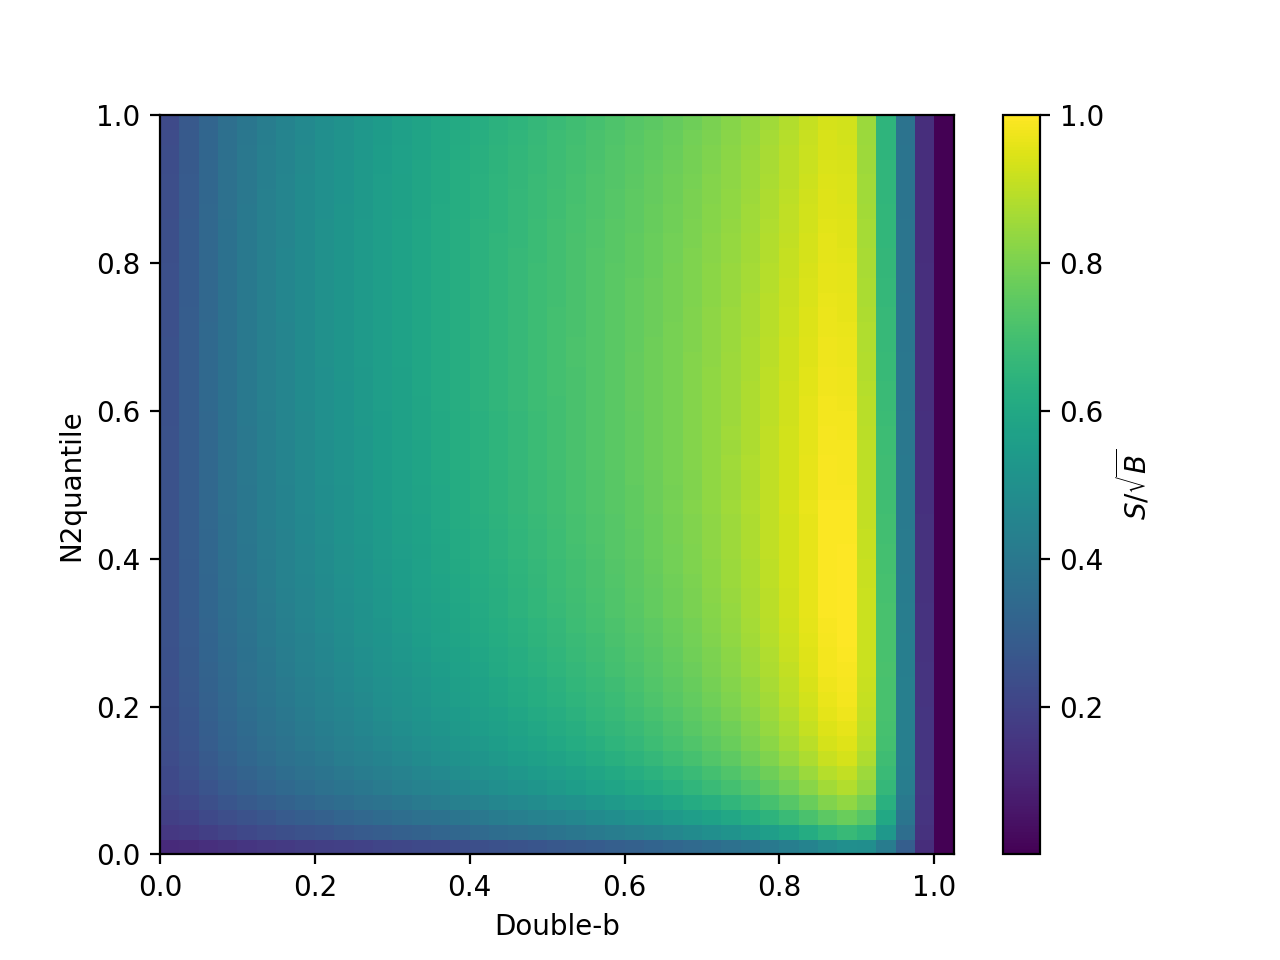

In [23]:
htemp = z2.project("process")
htemp.clear()
htemp.label = '$S/\sqrt{B}$'
htemp._sumw = {():norm_soverb}
fig, ax, _ = plot.plot2d(htemp, xaxis="AK8Puppijet0_deepdoubleb", xoverflow='over', patch_opts={})



In [25]:
fig.savefig("plots/Optimization_quantile_doubleb_withfinern2.pdf")


In [29]:
a = htemp.values()[()]
quantiles = np.quantile(a, [0.5, 0.9])
xx, yy = np.meshgrid(*tuple(ax.centers() for ax in h.axes()))
cc = ax.contour(xx, yy, a.T, quantiles, colors='w')
ax.clabel(cc, inline=1, fontsize=10)

AttributeError: module 'numpy' has no attribute 'quantile'

In [6]:
np.version.version

'1.14.2'

In [ ]:
tuples = tuples[::-1]

In [ ]:
print(tuples)

In [ ]:
htemp2 = z.project("process")
fig2, ax2, _ = plot.plot2d(htemp2, xaxis="AK8Puppijet0_deepdoubleb", xoverflow='allnan', patch_opts={})

In [ ]:
a = np.array([[7, -1, 3], [1, -2, 4], [10, 1, 5]])

In [ ]:
print(a)

In [ ]:
b = multidim_cumsum(a)

In [ ]:
print(b)

In [ ]:
tt = z.project("process").values(overflow='allnan')


In [ ]:
print(tt)

In [ ]:
print(hists)

In [ ]:
print(y)

In [ ]:
fig2, ax, _ = plot.plot2d(y2.sum("jetrho").sum("process"), xaxis="AK8Puppijet0_deepdoubleb", xoverflow='over', patch_opts={})

In [ ]:
fig2.savefig("plots/HBB_quantiledoubleb.pdf")


In [ ]:
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}

fig3, ax, _ = plot.plot1d(y2.sum("jetrho").sum("process").sum("AK8Puppijet0_deepdoubleb"), stack=True, fill_opts=fill_opts)


In [ ]:
fig3.savefig("plots/QCD_quantile.pdf")


In [ ]:
fig4, ax, _ = plot.plot2d(y.sum("AK8Puppijet0_deepdoubleb").sum("process"), xaxis="jetrho", xoverflow='over', patch_opts={})

In [ ]:
fig4.savefig("plots/QCD_N2_jetrho.pdf")


In [ ]:
fig5, ax, _ = plot.plot2d(x.sum("AK8Puppijet0_deepdoubleb").sum("process").sum("jetrho"), xaxis="AK8Puppijet0_pt", xoverflow='over', patch_opts={})

In [ ]:
fig5.savefig("plots/QCD_N2_jetpt.pdf")


In [ ]:
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}

fig6, ax, _ = plot.plot1d(y.sum("jetrho").sum("process").sum("AK8Puppijet0_deepdoubleb"), stack=True, fill_opts=fill_opts)


In [ ]:
fig7, ax, _ = plot.plot2d(y2.sum("AK8Puppijet0_deepdoubleb").sum("process"), xaxis="jetrho", xoverflow='over', patch_opts={})

In [ ]:
fig5, ax, _ = plot.plot2d(x2.sum("AK8Puppijet0_deepdoubleb").sum("process").sum("jetrho"), xaxis="AK8Puppijet0_pt", xoverflow='over', patch_opts={})

In [ ]:
a = np.array([[7, -1, 3], [1, -2, 4], [10, 1, 5]])

In [ ]:
print(a)

In [ ]:
multidim_cumsum(a)